In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

pd.set_option('display.max_columns', None)

# Load data

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.columns[2:]

Index(['AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AGE',
       'YEARS_EMPLOYED', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS',
       'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special', 'FLAG_OWN_CAR_Y',
       'FLAG_OWN_REALTY_Y', 'NAME_FAMILY_STATUS_Civil marriage',
       'NAME_FAMILY_STATUS_Married', 'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_FAMILY_STATUS_Widow', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'CODE_GENDER_M',
       'NAME_H

In [4]:
target = df[["TARGET"]]
data = df.iloc[:,2:]
col = []
cat = []
for column in df.columns[2:]:
    if column[:4] == "NAME" or column[:4] == "OCCU" or column[:4] == "CODE":
        cat.append(column)
    else:
        col.append(column)

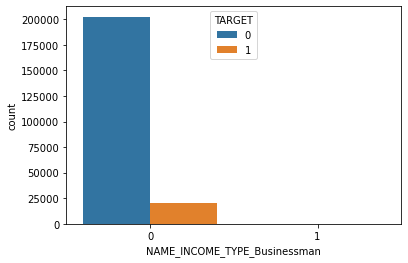

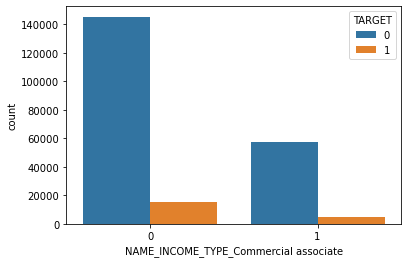

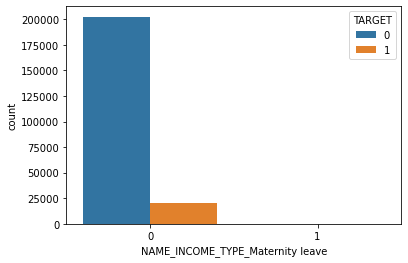

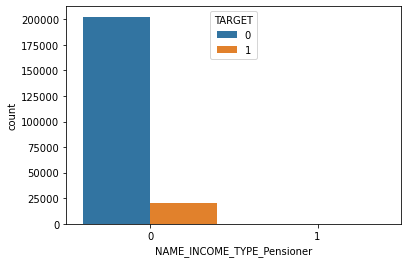

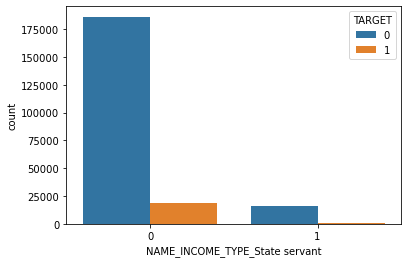

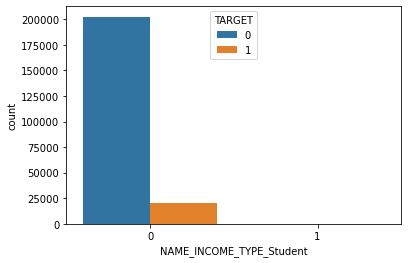

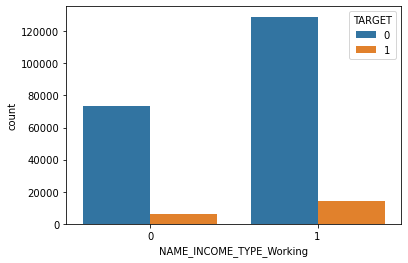

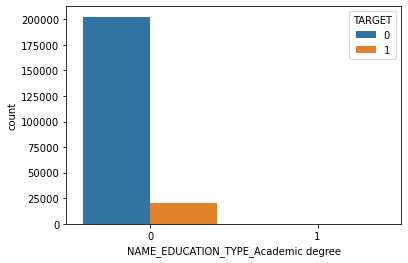

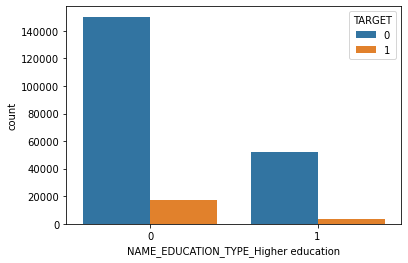

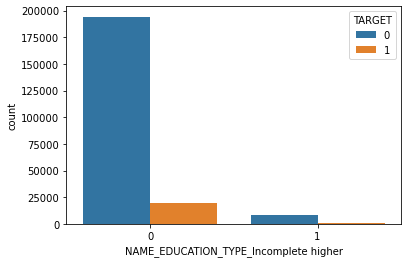

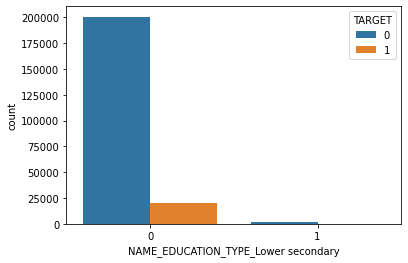

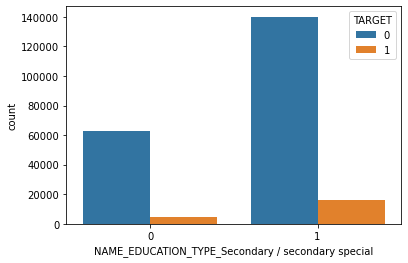

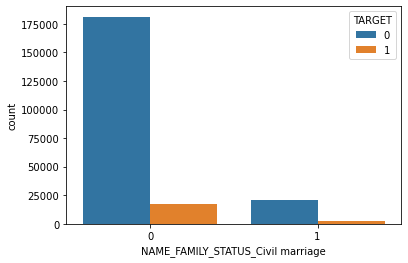

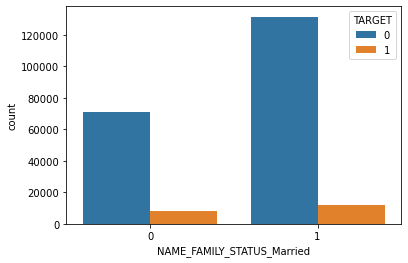

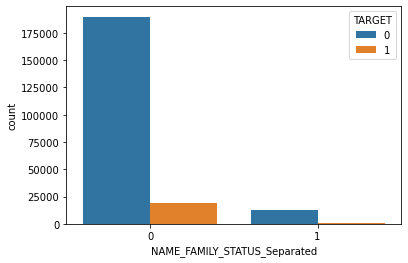

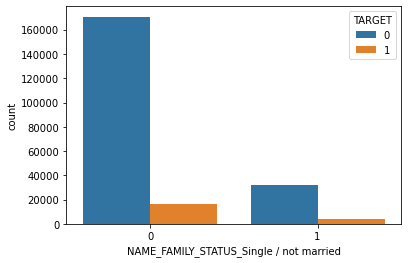

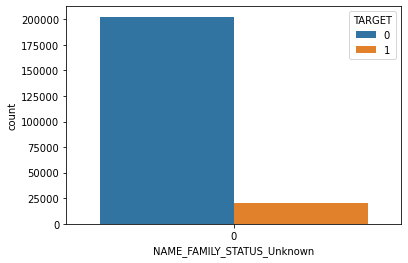

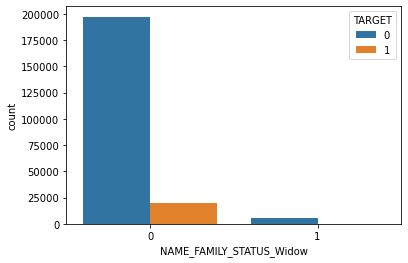

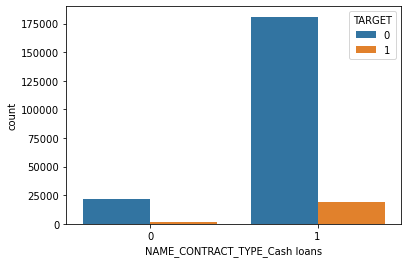

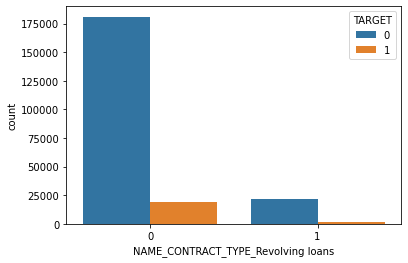

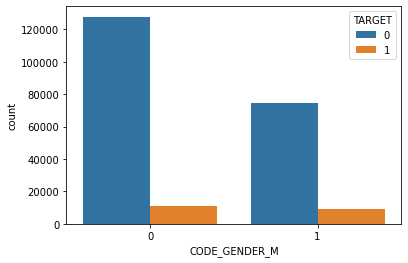

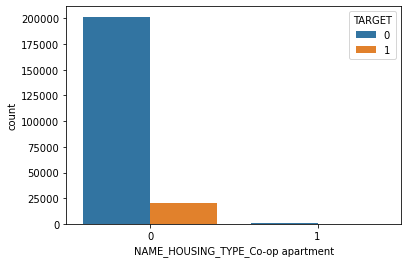

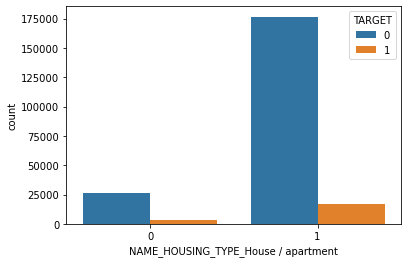

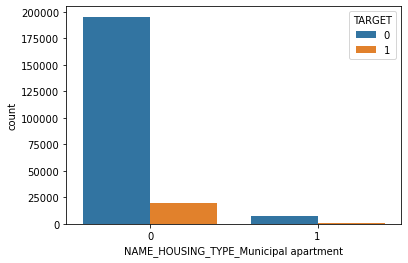

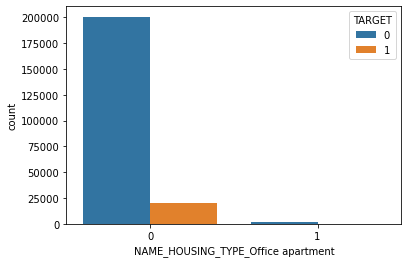

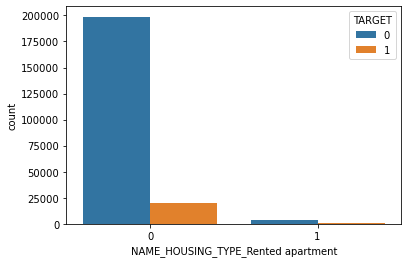

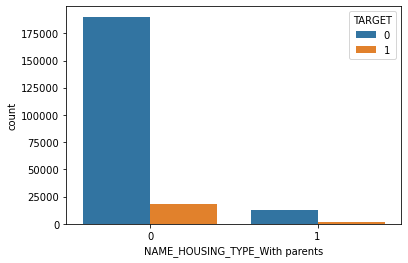

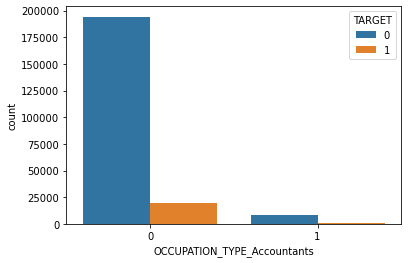

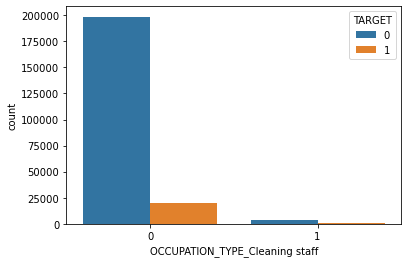

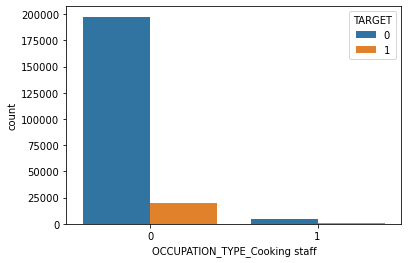

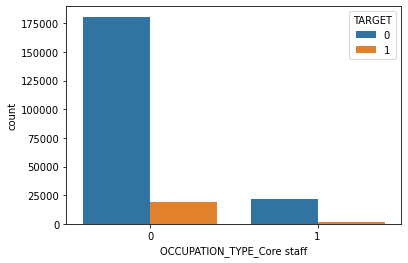

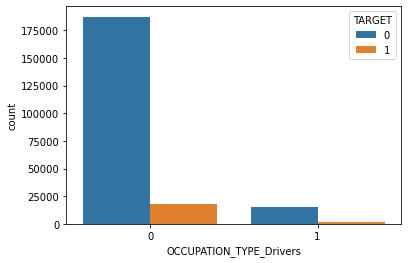

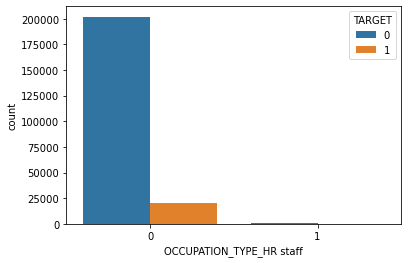

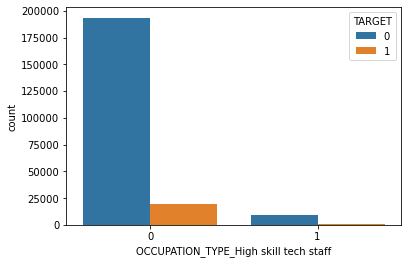

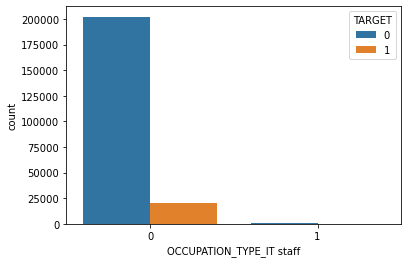

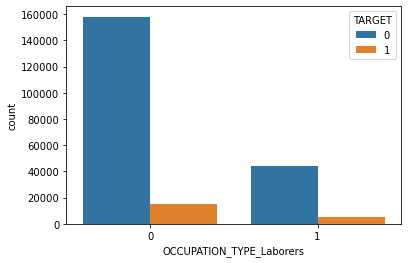

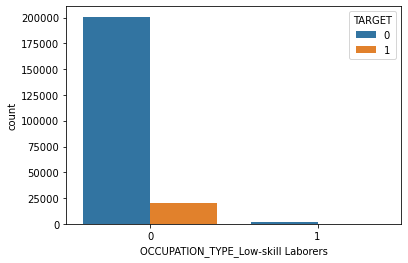

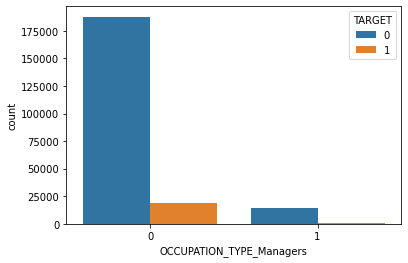

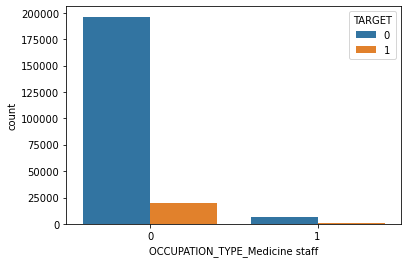

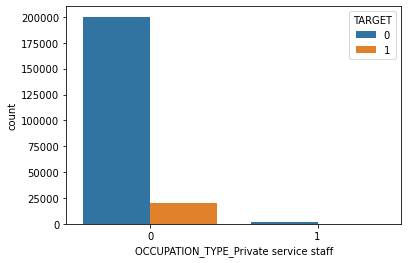

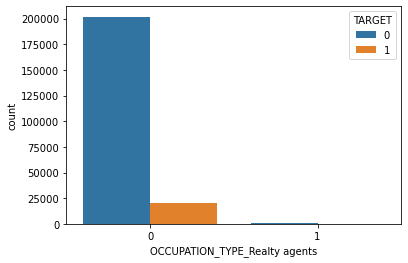

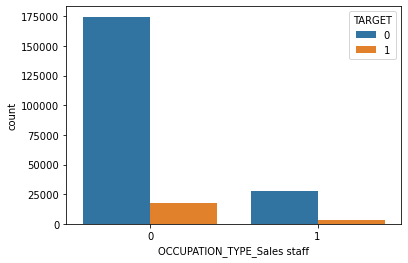

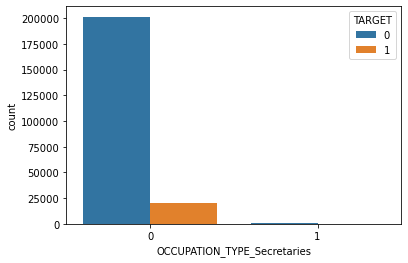

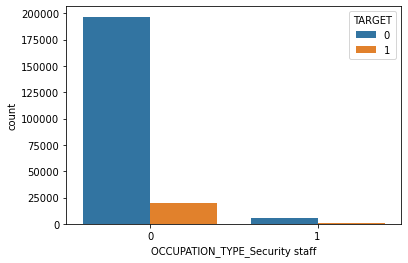

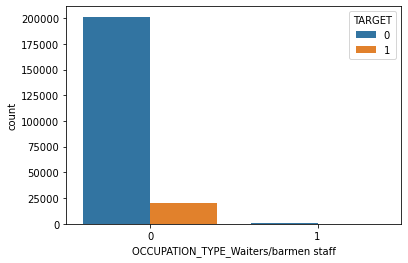

In [5]:
for column in cat:
    sns.countplot(x=column, hue="TARGET", data=df)
    plt.show()

# Correlation matrix

<AxesSubplot:>

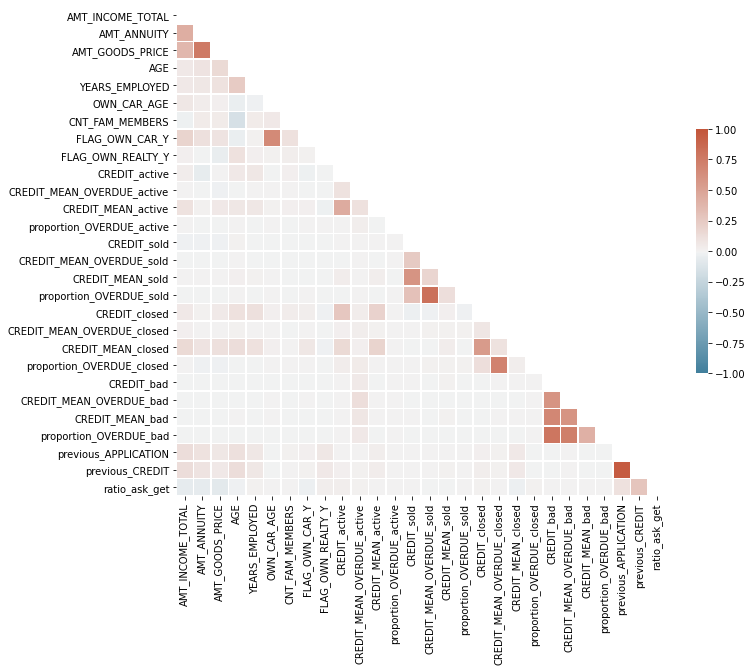

In [6]:
corrM = df[col].corr()
# Correlation matrix for no boolean variables
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrM, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrM, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
           vmin=-1, vmax=1)

Some variables are correlated. The correlation between them is not surprising

# Candidate's sex

In [7]:
tmp = df[df["TARGET"] == 0]["CODE_GENDER_M"].value_counts(normalize = True)
"For accepted loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For accepted loan sex ratio between female and male are 0.63/0.37'

In [8]:
tmp = df[df["TARGET"] == 1]["CODE_GENDER_M"].value_counts(normalize = True)
"For rejected loan sex ratio between female and male are {0:.2f}/{1:.2f}".format(tmp[0], tmp[1])

'For rejected loan sex ratio between female and male are 0.55/0.45'

# Workers repartition

In [9]:
col = []
for columns in df.columns:
    if columns[:16] == "NAME_INCOME_TYPE":
        col.append(columns)

## Application rejected

In [10]:
df[df["TARGET"] == 1][col].sum()

NAME_INCOME_TYPE_Businessman                 0
NAME_INCOME_TYPE_Commercial associate     4893
NAME_INCOME_TYPE_Maternity leave             2
NAME_INCOME_TYPE_Pensioner                   0
NAME_INCOME_TYPE_State servant            1097
NAME_INCOME_TYPE_Student                     0
NAME_INCOME_TYPE_Working                 14334
dtype: int64

<AxesSubplot:ylabel='None'>

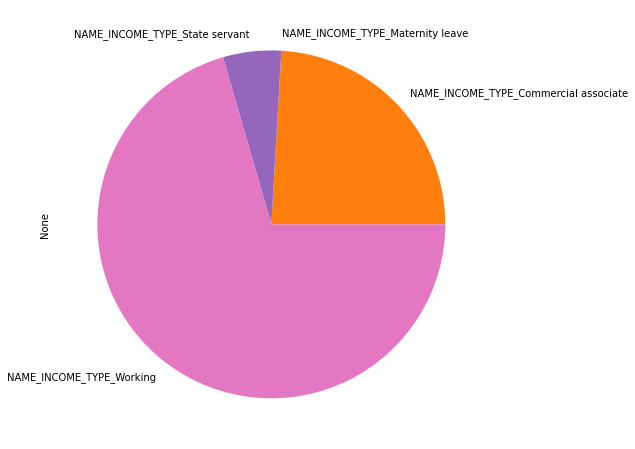

In [11]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [12]:
df[df["TARGET"] == 0][col].sum()

NAME_INCOME_TYPE_Businessman                  4
NAME_INCOME_TYPE_Commercial associate     57237
NAME_INCOME_TYPE_Maternity leave              2
NAME_INCOME_TYPE_Pensioner                    6
NAME_INCOME_TYPE_State servant            16240
NAME_INCOME_TYPE_Student                     16
NAME_INCOME_TYPE_Working                 128950
dtype: int64

<AxesSubplot:ylabel='None'>

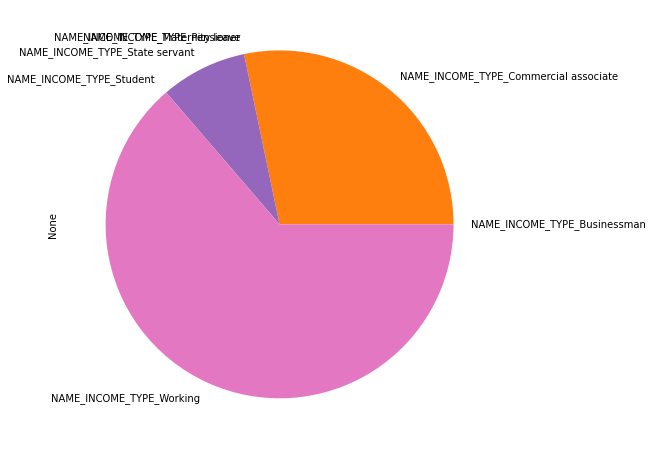

In [13]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Education type

In [14]:
col = []
for columns in df.columns:
    if columns[:19] == "NAME_EDUCATION_TYPE":
        col.append(columns)

## Application rejected

In [15]:
df[df["TARGET"] == 1][col].sum()

NAME_EDUCATION_TYPE_Academic degree                      2
NAME_EDUCATION_TYPE_Higher education                  3247
NAME_EDUCATION_TYPE_Incomplete higher                  790
NAME_EDUCATION_TYPE_Lower secondary                    305
NAME_EDUCATION_TYPE_Secondary / secondary special    15982
dtype: int64

<AxesSubplot:ylabel='None'>

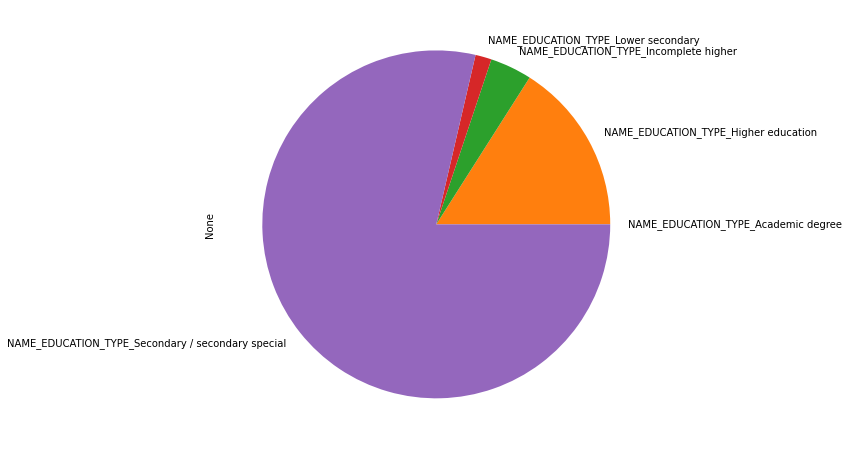

In [16]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [17]:
df[df["TARGET"] == 0][col].sum()

NAME_EDUCATION_TYPE_Academic degree                     109
NAME_EDUCATION_TYPE_Higher education                  52345
NAME_EDUCATION_TYPE_Incomplete higher                  8216
NAME_EDUCATION_TYPE_Lower secondary                    1818
NAME_EDUCATION_TYPE_Secondary / secondary special    139967
dtype: int64

<AxesSubplot:ylabel='None'>

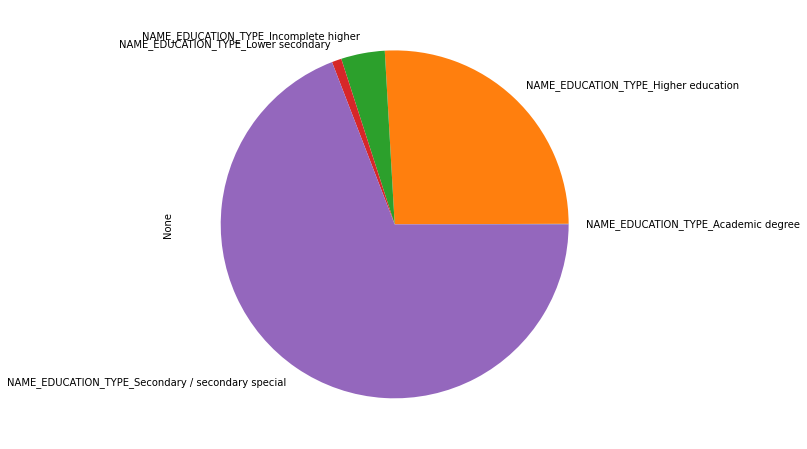

In [18]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Family status

In [19]:
len("NAME_FAMILY_STATUS")

18

In [20]:
col = []
for columns in df.columns:
    if columns[:18] == "NAME_FAMILY_STATUS":
        col.append(columns)

## Application rejected

In [21]:
df[df["TARGET"] == 1][col].sum()

NAME_FAMILY_STATUS_Civil marriage           2591
NAME_FAMILY_STATUS_Married                 12213
NAME_FAMILY_STATUS_Separated                1263
NAME_FAMILY_STATUS_Single / not married     3907
NAME_FAMILY_STATUS_Unknown                     0
NAME_FAMILY_STATUS_Widow                     352
dtype: int64

<AxesSubplot:ylabel='None'>

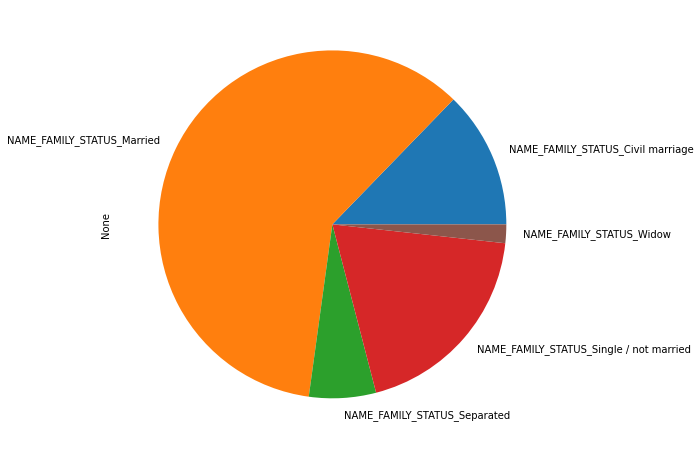

In [22]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))

## Application accepted

In [23]:
df[df["TARGET"] == 0][col].sum()

NAME_FAMILY_STATUS_Civil marriage           21280
NAME_FAMILY_STATUS_Married                 131484
NAME_FAMILY_STATUS_Separated                12686
NAME_FAMILY_STATUS_Single / not married     31864
NAME_FAMILY_STATUS_Unknown                      0
NAME_FAMILY_STATUS_Widow                     5141
dtype: int64

<AxesSubplot:ylabel='None'>

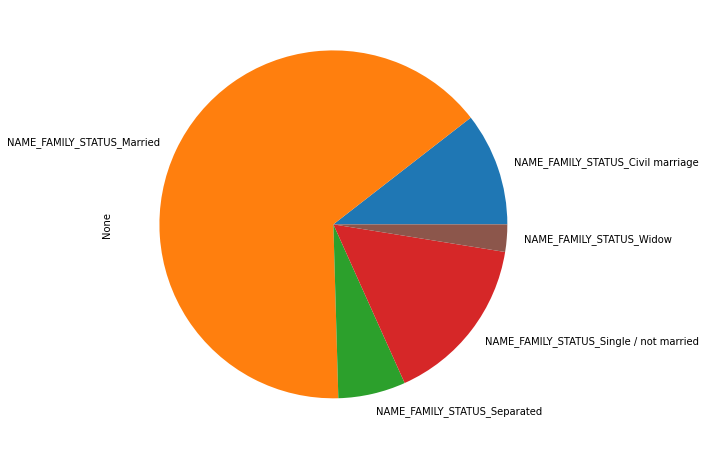

In [24]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))

# Car owner

Text(0.5, 1.0, 'Porportion of owner car for rejected credits')

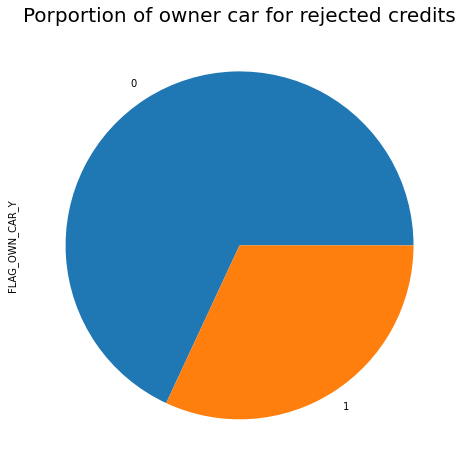

In [25]:
df[df["TARGET"] == 1]['FLAG_OWN_CAR_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for rejected credits", size = 20)

Text(0.5, 1.0, 'Porportion of owner car for accepted credits')

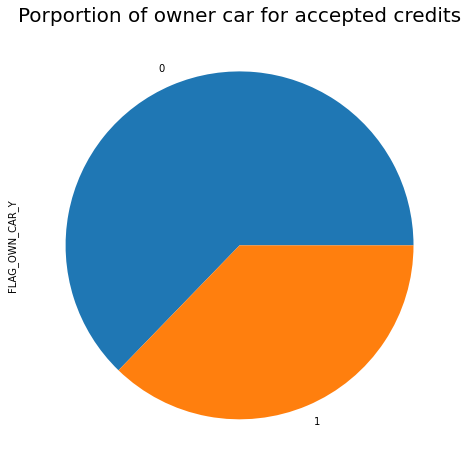

In [26]:
df[df["TARGET"] == 0]['FLAG_OWN_CAR_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for accepted credits", size = 20)

# Own reality 

Text(0.5, 1.0, 'Porportion of owner car for rejected credits')

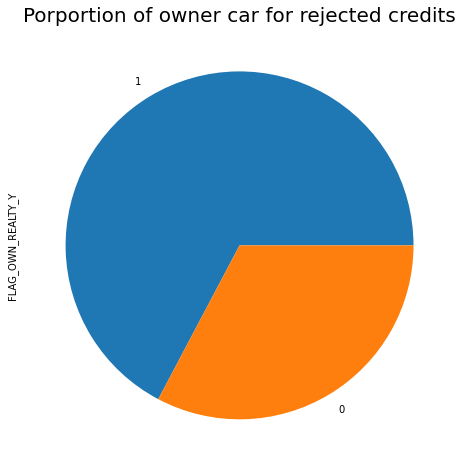

In [27]:
df[df["TARGET"] == 1]['FLAG_OWN_REALTY_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for rejected credits", size = 20)

Text(0.5, 1.0, 'Porportion of owner car for accepted credits')

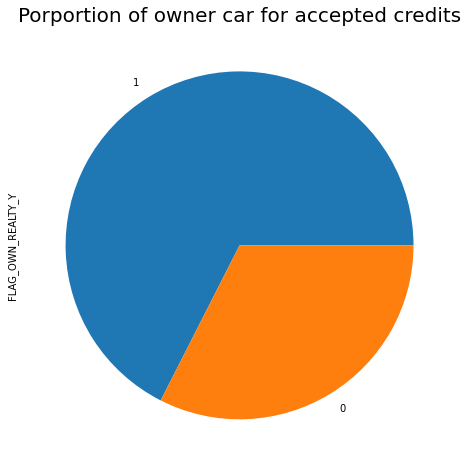

In [28]:
df[df["TARGET"] == 0]['FLAG_OWN_REALTY_Y'].value_counts().plot.pie(figsize=(8, 8))
plt.title("Porportion of owner car for accepted credits", size = 20)

# Occupation type

In [29]:
len("OCCUPATION_TYPE")

15

In [30]:
col = []
for columns in df.columns:
    if columns[:15] == "OCCUPATION_TYPE":
        col.append(columns)

In [31]:
df[df["TARGET"] == 1][col].sum()

OCCUPATION_TYPE_Accountants               429
OCCUPATION_TYPE_Cleaning staff            426
OCCUPATION_TYPE_Cooking staff             600
OCCUPATION_TYPE_Core staff               1575
OCCUPATION_TYPE_Drivers                  1996
OCCUPATION_TYPE_HR staff                   32
OCCUPATION_TYPE_High skill tech staff     626
OCCUPATION_TYPE_IT staff                   31
OCCUPATION_TYPE_Laborers                 5514
OCCUPATION_TYPE_Low-skill Laborers        358
OCCUPATION_TYPE_Managers                 1018
OCCUPATION_TYPE_Medicine staff            497
OCCUPATION_TYPE_Private service staff     164
OCCUPATION_TYPE_Realty agents              56
OCCUPATION_TYPE_Sales staff              3011
OCCUPATION_TYPE_Secretaries                85
OCCUPATION_TYPE_Security staff            696
OCCUPATION_TYPE_Waiters/barmen staff      149
dtype: int64

In [32]:
df[df["TARGET"] == 0][col].sum()

OCCUPATION_TYPE_Accountants               8142
OCCUPATION_TYPE_Cleaning staff            3938
OCCUPATION_TYPE_Cooking staff             4929
OCCUPATION_TYPE_Core staff               21709
OCCUPATION_TYPE_Drivers                  15152
OCCUPATION_TYPE_HR staff                   462
OCCUPATION_TYPE_High skill tech staff     9008
OCCUPATION_TYPE_IT staff                   412
OCCUPATION_TYPE_Laborers                 44436
OCCUPATION_TYPE_Low-skill Laborers        1675
OCCUPATION_TYPE_Managers                 14675
OCCUPATION_TYPE_Medicine staff            6214
OCCUPATION_TYPE_Private service staff     2235
OCCUPATION_TYPE_Realty agents              645
OCCUPATION_TYPE_Sales staff              27882
OCCUPATION_TYPE_Secretaries               1049
OCCUPATION_TYPE_Security staff            5672
OCCUPATION_TYPE_Waiters/barmen staff      1129
dtype: int64

Text(0.5, 1.0, 'Occupation type for accepted credits')

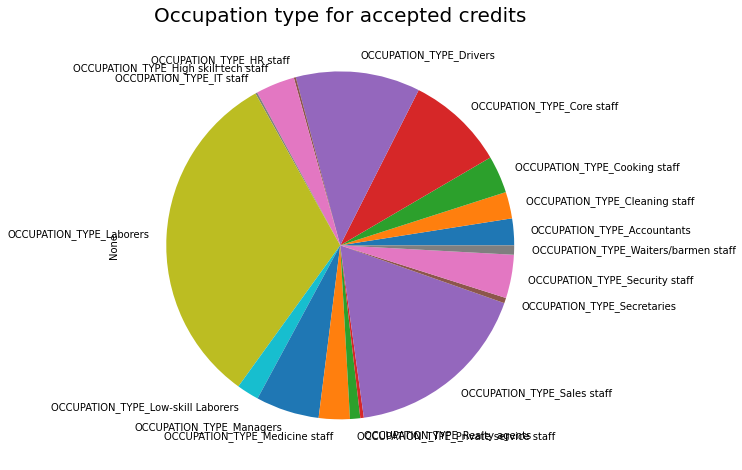

In [33]:
df[df["TARGET"] == 1][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

Text(0.5, 1.0, 'Occupation type for accepted credits')

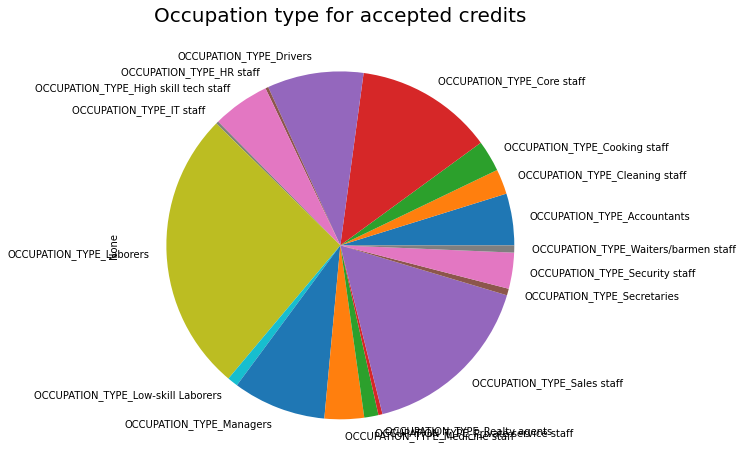

In [34]:
df[df["TARGET"] == 0][col].sum().plot.pie(figsize=(8, 8))
plt.title("Occupation type for accepted credits", size = 20)

# Logisitc regression

In [35]:
def score_sensibility(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
    sensibility = tp/(tp+fn)
    specificity = tn/(fp+tn)
    precision = tp/(tp+fp)
    accuracy = (tp+tn)/(tn+fn+tp+fp)
    print("Sensibility (rate of true positif) {0}".format(sensibility))
    print("Specificity (rate of true negatif) {0:.3f}".format(specificity))
    print("Precision (proportion of correct prediction of positif) {0:.3f}".format(precision))
    print("Accurary (proportion of correct prediction) {0:.3f}\n".format(accuracy))
    return sensibility

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [40]:
%%time
X = data.copy()
Y = target.copy()
Y.replace({0: False, 1: True}, inplace=True)
skf = StratifiedKFold(n_splits=4, random_state=42, shuffle = True)
skf.split(X, Y)

mdl = []
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    lr = LogisticRegression(C=10, max_iter = 5000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_test)
    mdl.append(lr)
    sensibility = score_sensibility(y_test, y_pred)
    print(accuracy_score(y_test, y_pred))


TN: 50611.0, FP: 3.0, FN: 5082.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.000
Accurary (proportion of correct prediction) 0.909

0.9087008043665613
TN: 50608.0, FP: 5.0, FN: 5080.0, TP: 2.0
Sensibility (rate of true positif) 0.0003935458480913026
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.286
Accurary (proportion of correct prediction) 0.909

0.90869916509561
TN: 50612.0, FP: 2.0, FN: 5078.0, TP: 3.0
Sensibility (rate of true positif) 0.000590434953749262
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.600
Accurary (proportion of correct prediction) 0.909

0.9087889397611993
TN: 50608.0, FP: 6.0, FN: 5081.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.000
Accurary (proportion 

# Random forest

In [43]:
%%time
mdl_clf = []
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, np.ravel(y_train))
    y_pred = clf.predict(X_test)
    mdl_clf.append(clf)
    sensibility = score_sensibility(y_test, y_pred)
#RandomForestClassifier(...)
#print(clf.predict([[0, 0, 0, 0]]))

TN: 50613.0, FP: 1.0, FN: 5080.0, TP: 2.0
Sensibility (rate of true positif) 0.0003935458480913026
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.667
Accurary (proportion of correct prediction) 0.909

TN: 50612.0, FP: 1.0, FN: 5081.0, TP: 1.0
Sensibility (rate of true positif) 0.0001967729240456513
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.500
Accurary (proportion of correct prediction) 0.909

TN: 50613.0, FP: 1.0, FN: 5079.0, TP: 2.0
Sensibility (rate of true positif) 0.000393623302499508
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.667
Accurary (proportion of correct prediction) 0.909

TN: 50612.0, FP: 2.0, FN: 5081.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.000
Accurary (proportion of correct prediction) 0.909

Wall ti

## Reduce features dimension

We use attibute **feature_importances_** to select features that contribute the most to prediction. 

In [44]:
features = []
for cpt, col in enumerate(data.columns):
    #clf.feature_importances_
    if clf.feature_importances_[cpt] > 0.001:
        print(col+" {0:.4f}".format(clf.feature_importances_[cpt]))
        features.append(col)

In [45]:
print("initial features {0}, keep only {1}".format(len(data.columns), len(features)))

initial features 73, keep only 57


## New model

In [46]:
def score_sensibility_specificity(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    #print("TN: {0}, FP: {1}, FN: {2}, TP: {3}".format(tn, fp, fn, tp))
    sensibility = tp/(tp+fn)
    specificity = tn/(fp+tn)
    return sensibility, specificity

In [47]:
%%time
X = data[features].copy()
Y = target.copy()
Y.replace({0: False, 1: True}, inplace=True)
skf.get_n_splits(X, Y)
print(skf)
skf = StratifiedKFold(n_splits=4, random_state=42, shuffle = True)
skf.split(X, Y)

mdl = []
sensibility = []
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    lr = LogisticRegression(C=10, max_iter = 5000).fit(X_train, np.ravel(y_train))
    y_pred = lr.predict(X_test)
    mdl.append(lr)
    sensibility.append(score_sensibility(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))


StratifiedKFold(n_splits=4, random_state=42, shuffle=True)
TN: 50612.0, FP: 2.0, FN: 5082.0, TP: 0.0
Sensibility (rate of true positif) 0.0
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.000
Accurary (proportion of correct prediction) 0.909

0.9087187589773054
TN: 50608.0, FP: 5.0, FN: 5080.0, TP: 2.0
Sensibility (rate of true positif) 0.0003935458480913026
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.286
Accurary (proportion of correct prediction) 0.909

0.90869916509561
TN: 50612.0, FP: 2.0, FN: 5078.0, TP: 3.0
Sensibility (rate of true positif) 0.000590434953749262
Specificity (rate of true negatif) 1.000
Precision (proportion of correct prediction of positif) 0.600
Accurary (proportion of correct prediction) 0.909

0.9087889397611993
TN: 50608.0, FP: 6.0, FN: 5080.0, TP: 1.0
Sensibility (rate of true positif) 0.000196811651249754
Specificity (rate of true negatif) 1.000
Precisi

Results are weak, the ML reject few candidates with bad profile. We compare our model with random precision with ROC curve

In [51]:
indice = np.where(sensibility == np.max(sensibility))[0][0]
best_mdl = mdl[indice]

In [66]:
list_sens = []
rate_posi = []
seuils = np.arange(0, 1.01, 0.01)[::-1]
for seuil in seuils:
    sensibility, specificity = score_sensibility_specificity(
                                y_test, 
                                best_mdl.predict_proba(X_test)[:,1] > seuil
                                )
    list_sens.append(sensibility)
    rate_posi.append(1-specificity)

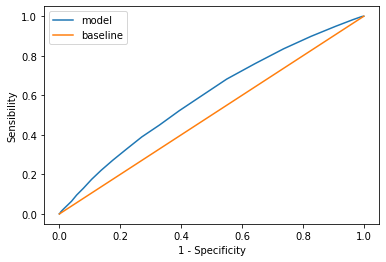

In [58]:
plt.plot(rate_posi, list_sens, label = "model")
plt.plot([0, 1], [0, 1], label = "baseline")
plt.legend()
plt.xlabel("1 - Specificity")
plt.ylabel("Sensibility")
plt.show()


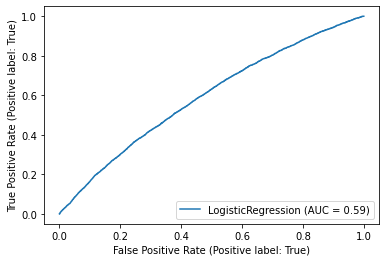

In [59]:
from sklearn import datasets, metrics, model_selection, svm
clf = svm.SVC(random_state=0)
metrics.plot_roc_curve(best_mdl, X_test, y_test)
plt.show()  

In [78]:
indices = np.where(np.array(list_sens) > 0.4)[0]
print("Sensibility values:")
print(np.array(list_sens)[indices])
print("1 - Specificity:")
print(np.array(rate_posi)[indices])
print("threshold")
print(seuils[np.where(np.array(list_sens) > 0)[0]])

Sensibility values:
[0.449321   0.52214131 0.59653611 0.68214918 0.75988979 0.83526865
 0.89824838 0.94902578 0.98287739 0.99881913 1.         1.        ]
1 - Specificity:
[0.3283874  0.39374481 0.46617537 0.54976884 0.64227289 0.7365551
 0.82653021 0.90731813 0.96463429 0.99423085 0.99998024 1.        ]
threshold
[0.33 0.32 0.31 0.3  0.29 0.28 0.27 0.26 0.25 0.24 0.23 0.22 0.21 0.2
 0.19 0.18 0.17 0.16 0.15 0.14 0.13 0.12 0.11 0.1  0.09 0.08 0.07 0.06
 0.05 0.04 0.03 0.02 0.01 0.  ]


In [76]:
np.array(list_sens)[indices]

array([0.449321  , 0.52214131, 0.59653611, 0.68214918, 0.75988979,
       0.83526865, 0.89824838, 0.94902578, 0.98287739, 0.99881913,
       1.        , 1.        ])